<a href="https://colab.research.google.com/github/sruthi1996/AlternusVera/blob/master/Sprint3_ContentStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Analysis on : Content Statitics:**

By Team Member: Sri Sruthi Chilukuri

When it comes to exploting data using statistical methods, we can use **exploratory graphics**

These are the priliminary steps we apply to the data in hand to: 1.feel the data- see their distributions and shape 2.check assumptions-and dependencies; correlations 3.check if the data assumptions match the methods/models we got to use 4.check for anomalies-outliers and unusual distributions and errors 5.get suggestions-help us persue a different angle or different method of analysis

why exploratory graphics? -information dense -best way to check for shape, gaps or outliers

with one variable: we use univariate distributions like bar chart.

boxplots for qualitataive variables; detect outliers histograms

scatterplot

multivariate distributions:

overall, content statistics help us with: have what u need? are there clumps or gaps? exceptional cases? errors in data?

**exploratory statistics:**

dealing with numerics in the data
what we do? -we explore the data -get emperical estimates

manipulate data(like transforming variables)
check sensitivity of results
robust statistics: -resampling technique - like cross validation -transforming - like smoothing functions fix skewed dataset

**descriptive statistics:** -tell data stroy use little data to stand in for a lot of data

use center of data - mean,mode,median
consider the spread of the data - ramge, percentiles, interquartile range, variance and std deviation

In [135]:
import pandas as pd
import numpy as np
import csv
import re
import seaborn as sns
from google.colab import drive
import gensim
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [136]:
drive.mount('/content/drive')
# Load Fake News dataset from Kaggle
fake_train = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/train_fakenews.csv",sep=',')
fake_test = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/test_fakenews.csv",sep=',')
fake_submit = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/submit_fakenews.csv",sep=',')
fake_test = pd.merge(fake_test, fake_submit, on="id", how='left')
fake_train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [137]:
print(fake_train.shape)
print(fake_test.shape)
print(fake_submit.shape)

(20800, 5)
(5200, 5)
(5200, 2)


In [138]:
df_final = pd.concat([fake_train, fake_test])
df_final.shape

(26000, 5)

In [139]:
df_final = df_final[['title', 'text','label']]
df_final = df_final.sample(frac=1).reset_index(drop=True)
df_final.head(5)

,title,text,label
0,Outrage Over Bundy Verdict: White Militants Ac...,16934 SHARES \nAfter Thursday’s Bundy verdict ...,1
1,Desperate Trump Supporter Offers Voters Discou...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,West Virginia Leads Nation In Heart Attacks - ...,New Report Finds Voters Have No Idea How Outra...,1
3,I Muted Donald Trump and Hillary Clinton Durin...,It was a little shimmy of her shoulders — c...,0
4,"Arthur Hiller, ‘Love Story’ Director and Box-O...","Arthur Hiller, an Academy director whose lon...",0


In [140]:
df_final.reset_index(drop=True)

,title,text,label
0,Outrage Over Bundy Verdict: White Militants Ac...,16934 SHARES \nAfter Thursday’s Bundy verdict ...,1
1,Desperate Trump Supporter Offers Voters Discou...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,West Virginia Leads Nation In Heart Attacks - ...,New Report Finds Voters Have No Idea How Outra...,1
3,I Muted Donald Trump and Hillary Clinton Durin...,It was a little shimmy of her shoulders — c...,0
4,"Arthur Hiller, ‘Love Story’ Director and Box-O...","Arthur Hiller, an Academy director whose lon...",0
...,...,...,...
25995,Jewish Leader Close To Trump Says President Ha...,TEL AVIV — President Donald Trump has convi...,0
25996,Rihanna In Child Porn Photos? – Morning News USA,Rihanna In Child Porn Photos? \nBy Comment \nR...,1
25997,Fendi’s Dolce Vita - The New York Times,ROME — It’s hard to hold a newsworthy fashi...,1
25998,Chelsea Bombing: What We Know and Don’t Know -...,Prosecutors on Tuesday charged Ahmad Khan Raha...,0


In [0]:
columns = [
  'jsonid', 
  'label', 
  'text', 
  'subject', 
  'speaker', 
  'speakerjobtitle', 
  'stateinfo',
  'partyaffiliation', 
  'barelytruecounts', 
  'falsecounts',
  'halftruecounts',
  'mostlytrueocunts',
  'pantsonfirecounts',
  'context'
  ]


In [0]:
liar_train = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/train.tsv",sep='\t', names=columns)
liar_test = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/test.tsv",sep='\t', names=columns)
liar_valid = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/valid.tsv",sep='\t', names=columns)

In [143]:
liar_train.head(2)

,jsonid,label,text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


In [144]:
liar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jsonid             10240 non-null  object 
 1   label              10240 non-null  object 
 2   text               10240 non-null  object 
 3   subject            10238 non-null  object 
 4   speaker            10238 non-null  object 
 5   speakerjobtitle    7343 non-null   object 
 6   stateinfo          8032 non-null   object 
 7   partyaffiliation   10238 non-null  object 
 8   barelytruecounts   10238 non-null  float64
 9   falsecounts        10238 non-null  float64
 10  halftruecounts     10238 non-null  float64
 11  mostlytrueocunts   10238 non-null  float64
 12  pantsonfirecounts  10238 non-null  float64
 13  context            10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


We can see that in liar train dataset, half true news are more as compared to other category of news.

For a better classification; we combine the labels in the following way:

"False", "half-true", "barely-true", "pants-fire" as lies i.e. class 0
"True" & "mostly-true" as truth i.e. class 1

In [145]:
cat_to_nums = {"label":     {"true":1, "false":0, "barely-true": 0, "half-true": 0, "mostly-true": 1,"pants-fire": 0} }
liar_train.replace(cat_to_nums, inplace=True)
liar_train['label']

0        0
1        0
2        1
3        0
4        0
        ..
10235    1
10236    1
10237    0
10238    0
10239    0
Name: label, Length: 10240, dtype: int64

In [146]:
# Load Politifact news dataset
politifact_fake = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/poitifact_dataset/Fake.csv",sep=',')
politifact_fake['label'] = 1
politifact_true = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/poitifact_dataset/True.csv",sep=',')
politifact_true['label'] = 0
df_politifact = pd.concat([politifact_fake, politifact_true])
df_politifact.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [147]:
df_politifact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [148]:
df_final = df_final.append(df_politifact[['title', 'text', 'label']])
df_final = df_final.sample(frac=1).reset_index(drop=True)
df_final.head()

,title,text,label
0,Crushed: Trump’s Hollywood Walk of Fame Star S...,0 88 0 1 After running one of the most divisiv...,1
1,South Korea says U.S. designation of North Kor...,SEOUL (Reuters) - South Korea s foreign minist...,0
2,Nine killed in fighting between different bran...,MOGADISHU (Reuters) - Fighting between the mil...,0
3,BREAKING: HILLARY CAUGHT Using Teen Actor Whos...,Our first female candidate for President is so...,1
4,EU agreed no sum needed to move talks forward:...,LONDON (Reuters) - The European Union agreed t...,0


In [149]:
df_final['title'] = df_final['title'].astype('str')
df_final['text'] = df_final['text'].astype('str')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70898 entries, 0 to 70897
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   70898 non-null  object
 1   text    70898 non-null  object
 2   label   70898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


###Text Cleaning

In this section, we are going to clean the tile and text string by performing the following text cleaning operations

- Lower case text
- Remove special characters
- Tokenize text into words using nltk
- Remove stop Words
- Lemmatization and Stemming

In [150]:
#Text Cleaning
import re
import time
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Remove this line when you want to run this for complete dataset
df_final = df_final.truncate(after=10000)

def text_cleaning(text):
  lemmatizer = WordNetLemmatizer()
  clean_text = re.sub("[^a-zA-Z]", " ", text)
  lowered_text = clean_text.lower()
  words = nltk.word_tokenize(lowered_text)
  # All stop words
  stop_words = set(nltk.corpus.stopwords.words("english"))
  filtered_words = [word for word in  words  if not word in stop_words]
  lemm_words = [lemmatizer.lemmatize(word) for word in filtered_words]
  stems = [SnowballStemmer('english').stem(word) for word in lemm_words]
  return " ".join(stems)

t1 = time.time()
df_final["title"] = df_final["title"].apply(text_cleaning)
df_final["text"] = df_final["text"].apply(text_cleaning)
t2 = time.time()
print("Time take for text cleaning with length: {} is {} mins".format(len(df_final), (t2-t1)/60))
df_final.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Time take for text cleaning with length: 10001 is 1.4334398229916891 mins


,title,text,label
0,crush trump hollywood walk fame star smash sle...,run one divis presidenti campaign u histori tr...,1
1,south korea say u design north korea terrorist...,seoul reuter south korea foreign ministri said...,0
2,nine kill fight differ branch somali govern fo...,mogadishu reuter fight militari polic back int...,0
3,break hillari caught use teen actor whose fath...,first femal candid presid crook dirti actual u...,1
4,eu agre sum need move talk forward british bre...,london reuter european union agre britain woul...,0


In [151]:
df_final['title'].isna().sum()

0

In [152]:
df_final['text'].isna().sum()

0

In [153]:
df_final.shape

(10001, 3)

###Exploratory statistics

**Number of characters in "Title" and "Text"**

Extracting samples number in each class of the dataset

In [0]:
fake = df_final[df_final['label'] == 1].shape[0]
Not_fake = df_final[df_final['label'] == 0].shape[0]

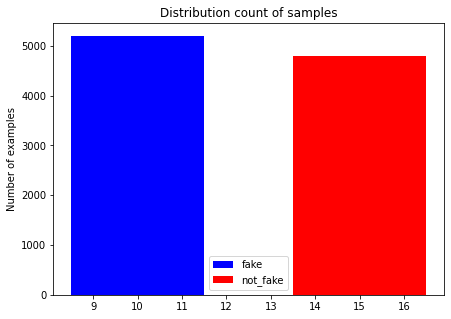

In [155]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,fake,3, label="fake", color='blue')
plt.bar(15,Not_fake,3, label="not_fake", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Distribution count of samples')
plt.show()

In [156]:
df_final['label'].value_counts()

1    5199
0    4802
Name: label, dtype: int64

In [157]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10001 non-null  object
 1   text    10001 non-null  object
 2   label   10001 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


Now, lets analyse the number of characters in each "title" samples; i.e. lets check the length of each "title" sample in the dataframe by plotting it over a distribution

In [0]:
def length(title):    
    return len(title)

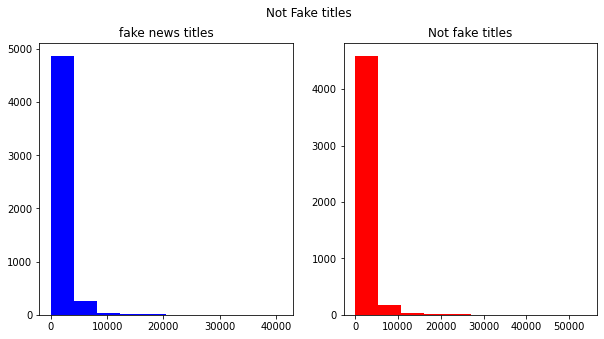

In [159]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
title_len=df_final[df_final['label']==1]['text'].str.len()
ax1.hist(title_len,color='blue')
ax1.set_title('fake news titles')
title_len=df_final[df_final['label']==0]['text'].str.len()
ax2.hist(title_len,color='red')
ax2.set_title('Not fake titles')
fig.suptitle('Not Fake titles')
plt.show()

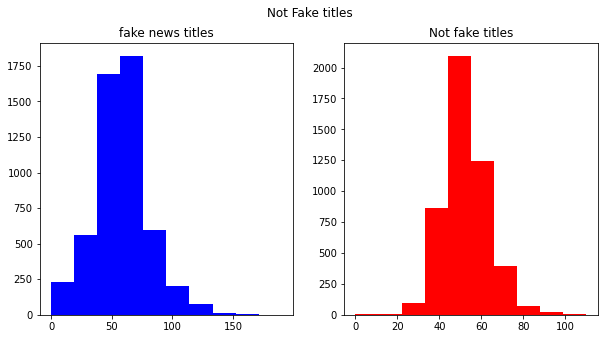

In [160]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
title_len=df_final[df_final['label']==1]['title'].str.len()
ax1.hist(title_len,color='blue')
ax1.set_title('fake news titles')
title_len=df_final[df_final['label']==0]['title'].str.len()
ax2.hist(title_len,color='red')
ax2.set_title('Not fake titles')
fig.suptitle('Not Fake titles')
plt.show()

Number of words in a text

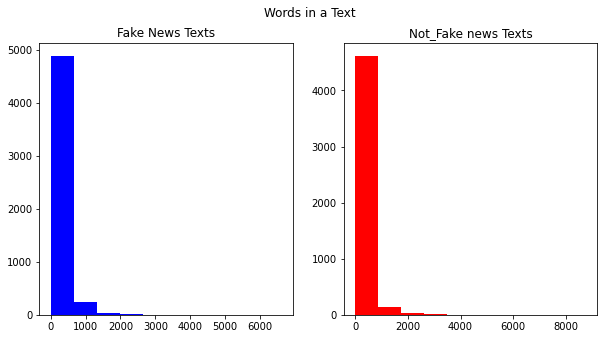

In [162]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_final[df_final['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='blue')
ax1.set_title('Fake News Texts')
text_len=df_final[df_final['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Not_Fake news Texts')
fig.suptitle('Words in a Text')
plt.show()

Average word Length in each Text

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'Average word length in each News Text')

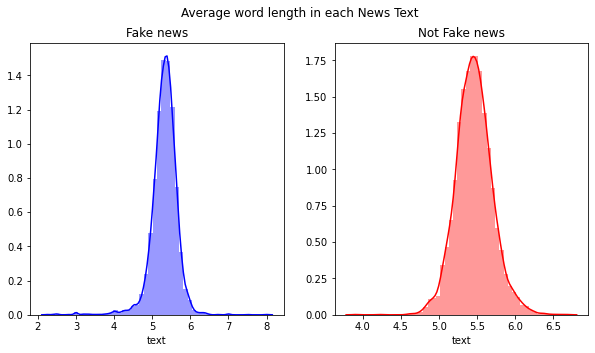

In [163]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_final[df_final['label']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Fake news')
word=df_final[df_final['label']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not Fake news')
fig.suptitle('Average word length in each News Text')

N-Gram Analysis

For this dataset, I will take n=2 i.e. bigram over the text of the news. Checking for the common bigrams in the texts

In [0]:
def get_top_text_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

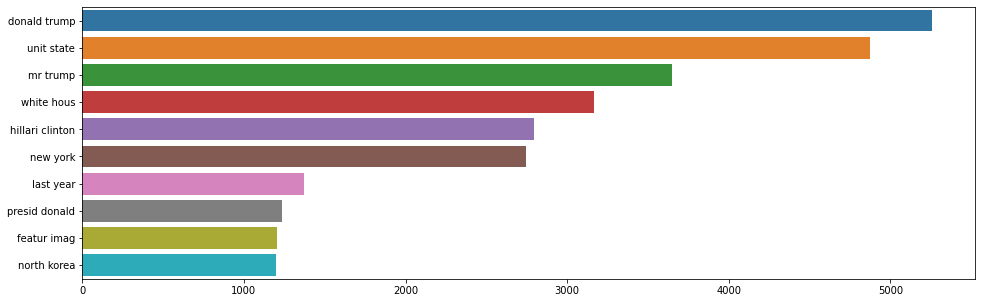

In [166]:
plt.figure(figsize=(16,5))
top_text_bigrams=get_top_text_bigrams(df_final['text'])[:10]
x,y=map(list,zip(*top_text_bigrams))
sns.barplot(x=y,y=x)

Inference:

The terms "donald trump" and "unit state" have been most common; both in class 0 and class 1.

Wordclouds

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_wordcloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

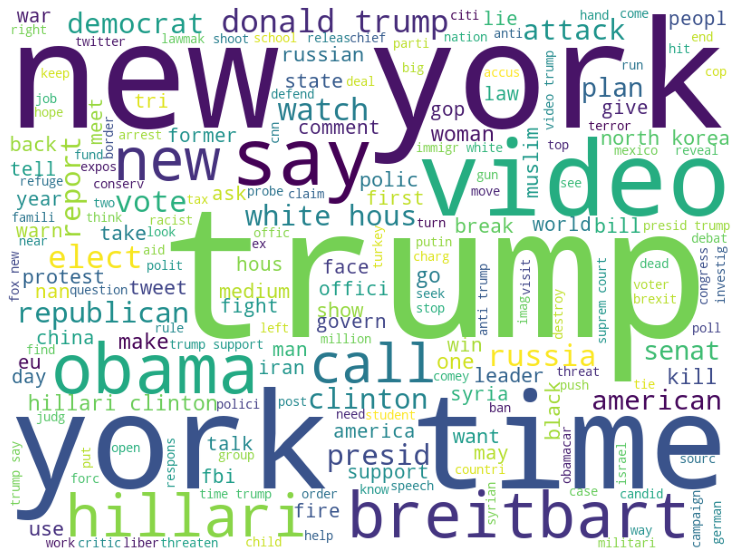

In [169]:
plot_wordcloud(' '.join(df_final['title']))

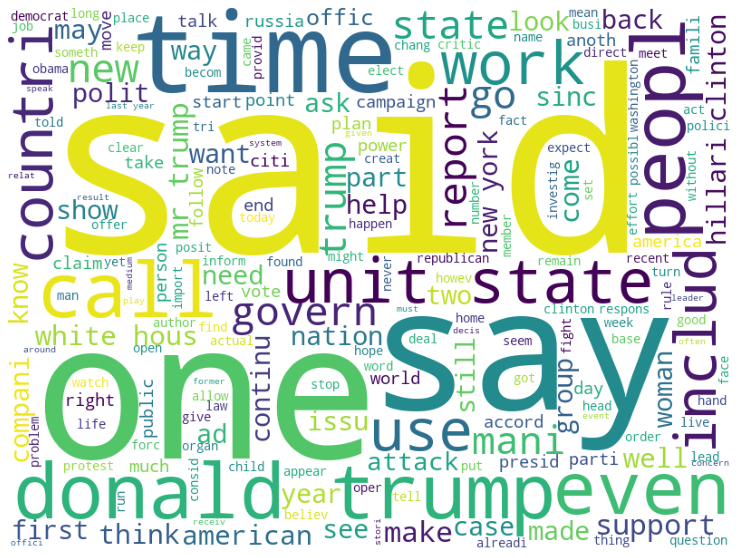

In [170]:
plot_wordcloud(' '.join(df_final['text']))

Adding features to the datasets that show the statistics like length, median, mean of the textual features and normalise them.

In [0]:
df_final['Title_length'] = df_final['title'].str.len()

In [0]:
df_final['Text_length'] = df_final['text'].str.len()

In [173]:
df_final

,title,text,label,Title_length,Text_length
0,crush trump hollywood walk fame star smash sle...,run one divis presidenti campaign u histori tr...,1,59,1604
1,south korea say u design north korea terrorist...,seoul reuter south korea foreign ministri said...,0,72,266
2,nine kill fight differ branch somali govern fo...,mogadishu reuter fight militari polic back int...,0,54,1112
3,break hillari caught use teen actor whose fath...,first femal candid presid crook dirti actual u...,1,99,2803
4,eu agre sum need move talk forward british bre...,london reuter european union agre britain woul...,0,56,391
...,...,...,...,...,...
9996,break trust break bank insid stori russia bigg...,realiti check medium break trust break bank in...,1,74,2323
9997,marin le pen echo trump bleak popul french cam...,lyon franc french leader marin le pen deliv gr...,0,73,3160
9998,watch russian politician gloat live tv putin s...,donald trump may call anyth relat administr co...,1,56,816
9999,reilli report strife wh fake news crisi manufa...,thursday spin news podcast bill reilli weigh c...,0,60,869


In [0]:
import pandas as pd
from sklearn import preprocessing


In [0]:
df_final["Title_length(norm)"] = df_final["Title_length"] / df_final["Title_length"].max()
df_final["Text_length(norm)"] = df_final["Text_length"] / df_final["Text_length"].max()


In [0]:
#Generating statistical columns like mean, median and variance for the "Text" present in the dataset.
df_final["Text_length(median)"] = df_final["Text_length"].median()
df_final["Text_length(mean)"] = df_final["Text_length"].mean()
df_final["Text_length(var)"] = df_final["Text_length"].var()

#creating a new feature "applicability_of_text" which is a combination of then text length 
df_final["applicability_of_text"] = df_final["Text_length(norm)"]*df_final["Text_length"].mean()
df_final["applicability_of_title"] = df_final["Title_length(norm)"]*df_final["Title_length"].mean()


In [177]:
df_final["applicability_of_text"]

0         57.193891
1          9.484772
2         39.650628
3         99.946681
4         13.941902
            ...    
9996      82.831302
9997     112.676244
9998      29.096144
9999      30.985967
10000     35.157841
Name: applicability_of_text, Length: 10001, dtype: float64

normalizing these columns

In [0]:
df_final["applicability_of_text(Norm)"] = df_final["applicability_of_text"] / df_final["applicability_of_text"].max()*df_final["Text_length(median)"]
df_final["applicability_of_title(Norm)"] = df_final["applicability_of_title"] / df_final["applicability_of_title"].max()*df_final["Text_length(median)"]

In [179]:
df_final.columns

Index(['title', 'text', 'label', 'Title_length', 'Text_length',
       'Title_length(norm)', 'Text_length(norm)', 'Text_length(median)',
       'Text_length(mean)', 'Text_length(var)', 'applicability_of_text',
       'applicability_of_title', 'applicability_of_text(Norm)',
       'applicability_of_title(Norm)'],
      dtype='object')

In [0]:
df_sample = df_final

In [182]:
df_sample.head(2)

,title,text,label,Title_length,Text_length,Title_length(norm),Text_length(norm),Text_length(median),Text_length(mean),Text_length(var),applicability_of_text,applicability_of_title,applicability_of_text(Norm),applicability_of_title(Norm)
0,crush trump hollywood walk fame star smash sle...,run one divis presidenti campaign u histori tr...,1,59,1604,0.310526,0.029759,1438.0,1921.914409,4.292013e+06,57.193891,17.115927,42.793173,446.536842
1,south korea say u design north korea terrorist...,seoul reuter south korea foreign ministri said...,0,72,266,0.378947,0.004935,1438.0,1921.914409,4.292013e+06,9.484772,20.887233,7.096623,544.926316


Dropping the regular columns; retaining the normalised columns.

In [0]:
#df_final = df_final.drop(['label'], axis=1)
df_sample = df_sample.drop(['title', 'text', 'Title_length', 'Text_length', 'applicability_of_text', 'applicability_of_title', 'Text_length(median)', 'Text_length(mean)'], axis=1)

In [184]:
df_sample

,label,Title_length(norm),Text_length(norm),Text_length(var),applicability_of_text(Norm),applicability_of_title(Norm)
0,1,0.310526,0.029759,4.292013e+06,42.793173,446.536842
1,0,0.378947,0.004935,4.292013e+06,7.096623,544.926316
2,0,0.284211,0.020631,4.292013e+06,29.667087,408.694737
3,1,0.521053,0.052004,4.292013e+06,74.781336,749.273684
4,0,0.294737,0.007254,4.292013e+06,10.431503,423.831579
...,...,...,...,...,...,...
9996,1,0.389474,0.043098,4.292013e+06,61.975399,560.063158
9997,0,0.384211,0.058627,4.292013e+06,84.305751,552.494737
9998,1,0.294737,0.015139,4.292013e+06,21.770093,423.831579
9999,0,0.315789,0.016122,4.292013e+06,23.184082,454.105263


In [0]:
y = df_sample['label']
X = df_sample.drop(['label'], axis=1)

In [0]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score, \
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [0]:
classifiers = {
    "LogisticRegression": (LogisticRegression()),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
def run_all_models(folds=5):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        if classifier_name != 'Support Vector Classifier':
            y_final_pred_prob = model.predict_proba(X_test)
            plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
            plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)



In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= LogisticRegression =============================
Mean cross validation score: 0.519875
Mean precision score: 0.5198750000000001
Mean Recall score: 1.0
Mean ROC-AUC score: 0.5
Mean F1 score: 0.6841022754335448
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5197401299350325
confusion matrix for the real test set:
 [[   0  961]
 [   0 1040]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       961
           1       0.52      1.00      0.68      1040

    accuracy                           0.52      2001
   macro avg       0.26      0.50      0.34      2001
weighted avg       0.27      0.52      0.36      2001



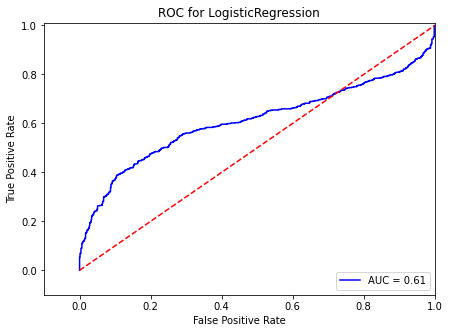

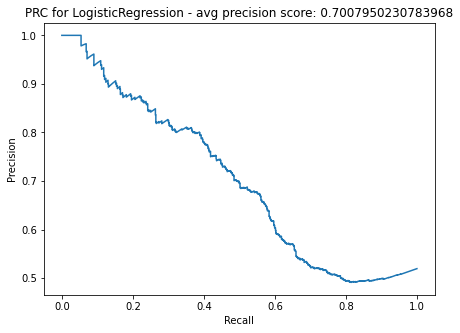

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector 

============================= KNearest =============================
Mean cross validation score: 0.695
Mean precision score: 0.720710967468722
Mean Recall score: 0.6996852726094602
Mean ROC-AUC score: 0.7030089507824068
Mean F1 score: 0.7100136583798399
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6686656671664168
confusion matrix for the real test set:
 [[636 325]
 [338 702]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66       961
           1       0.68      0.68      0.68      1040

    accuracy                           0.67      2001
   macro avg       0.67      0.67      0.67      2001
weighted avg       0.67      0.67      0.67      2001



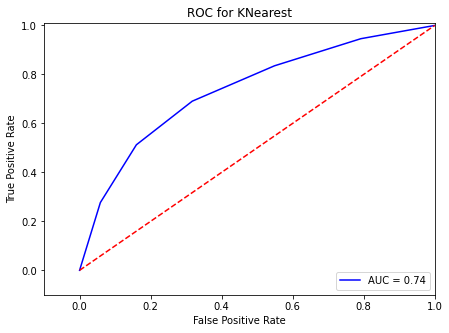

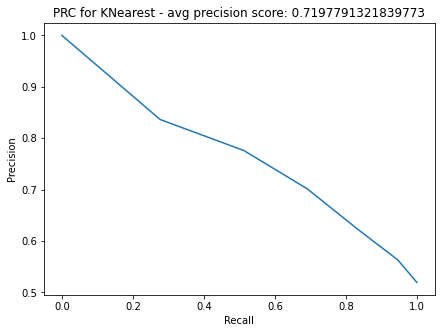

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= Support Vector Classifier =============================
Mean cross validation score: 0.519875
Mean precision score: 0.5198750000000001
Mean Recall score: 1.0
Mean ROC-AUC score: 0.5
Mean F1 score: 0.6841022754335448
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5197401299350325
confusion matrix for the real test set:
 [[   0  961]
 [   0 1040]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       961
           1       0.52      1.00      0.68      1040

    accuracy                           0.52      2001
   macro avg       0.26      0.50      0.34      2001
weighted avg       0.27      0.52      0.36      2001



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


============================= DecisionTreeClassifier =============================
Mean cross validation score: 0.6446562499999999
Mean precision score: 0.6603992345648171
Mean Recall score: 0.6662616865685458
Mean ROC-AUC score: 0.6476307010541038
Mean F1 score: 0.6632603370809547
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6376811594202898
confusion matrix for the real test set:
 [[587 374]
 [351 689]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62       961
           1       0.65      0.66      0.66      1040

    accuracy                           0.64      2001
   macro avg       0.64      0.64      0.64      2001
weighted avg       0.64      0.64      0.64      2001



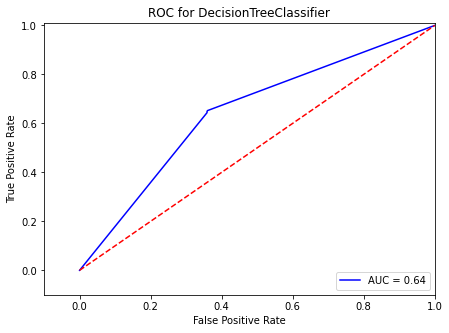

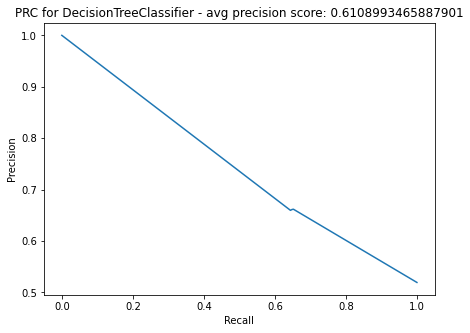

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

============================= Naive Bayes =============================
Mean cross validation score: 0.6736875000000001
Mean precision score: 0.7772547789434963
Mean Recall score: 0.5280136304730167
Mean ROC-AUC score: 0.6816049201888275
Mean F1 score: 0.6284459343433644
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6526736631684158
confusion matrix for the real test set:
 [[799 162]
 [533 507]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.60      0.83      0.70       961
           1       0.76      0.49      0.59      1040

    accuracy                           0.65      2001
   macro avg       0.68      0.66      0.65      2001
weighted avg       0.68      0.65      0.64      2001



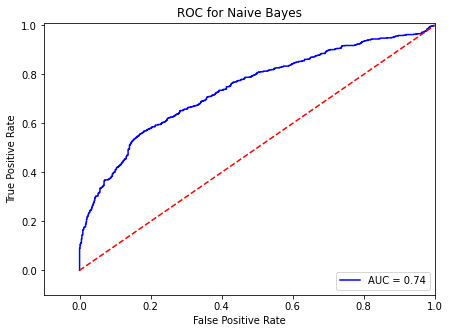

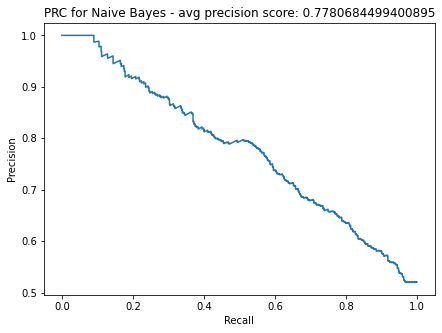

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y wa

============================= Random forests =============================
Mean cross validation score: 0.6728124999999998
Mean precision score: 0.6935890886659205
Mean Recall score: 0.6840565120799778
Mean ROC-AUC score: 0.6783998966988533
Mean F1 score: 0.6887702477878934
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6626686656671664
confusion matrix for the real test set:
 [[623 338]
 [337 703]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       961
           1       0.68      0.68      0.68      1040

    accuracy                           0.66      2001
   macro avg       0.66      0.66      0.66      2001
weighted avg       0.66      0.66      0.66      2001



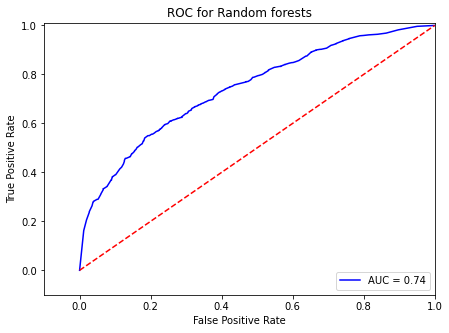

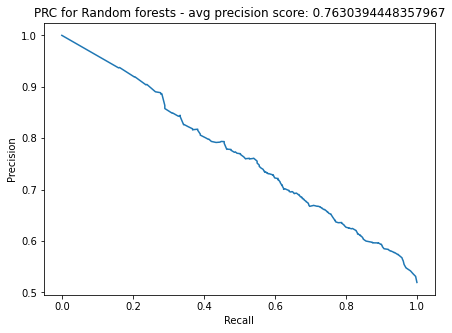

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

============================= XGBoost Classifier =============================
Mean cross validation score: 0.7272187499999998
Mean precision score: 0.7732837977525602
Mean Recall score: 0.678045450337869
Mean ROC-AUC score: 0.7313700647874868
Mean F1 score: 0.7224635180951932
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.711144427786107
confusion matrix for the real test set:
 [[739 222]
 [356 684]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       961
           1       0.75      0.66      0.70      1040

    accuracy                           0.71      2001
   macro avg       0.71      0.71      0.71      2001
weighted avg       0.72      0.71      0.71      2001



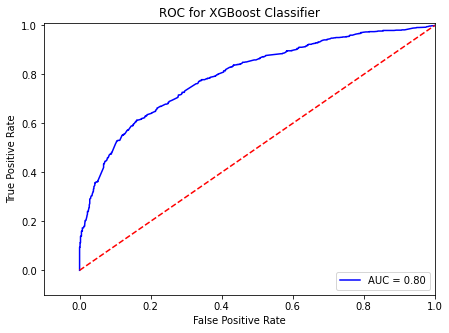

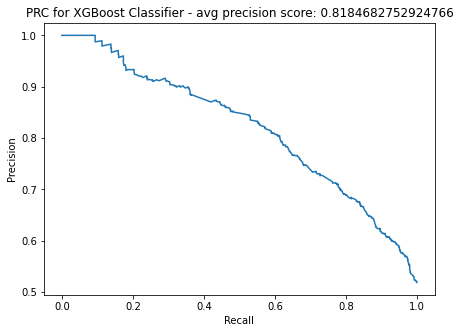

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

============================= GradientBoostingClassifier =============================
Mean cross validation score: 0.72565625
Mean precision score: 0.7703265555983435
Mean Recall score: 0.6852584351569009
Mean ROC-AUC score: 0.7319829507817449
Mean F1 score: 0.7252634804329757
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.712143928035982
confusion matrix for the real test set:
 [[730 231]
 [345 695]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72       961
           1       0.75      0.67      0.71      1040

    accuracy                           0.71      2001
   macro avg       0.71      0.71      0.71      2001
weighted avg       0.72      0.71      0.71      2001



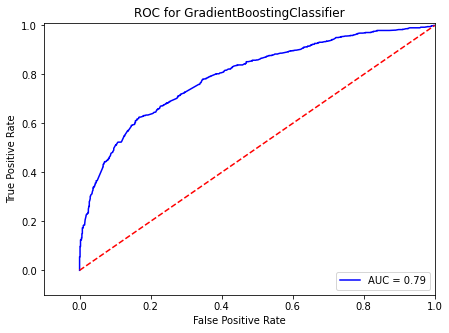

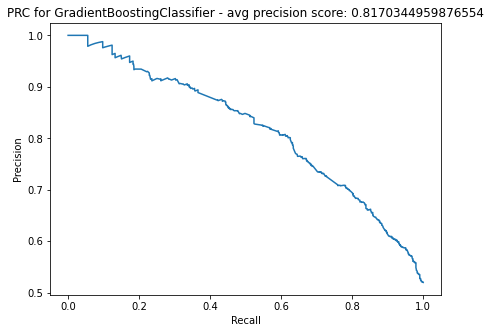

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

============================= MLP Classifier =============================
Mean cross validation score: 0.50059375
Mean precision score: 0.41526406219953954
Mean Recall score: 0.7793269230769231
Mean ROC-AUC score: 0.4989080838834984
Mean F1 score: 0.5415815396070075
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.519240379810095
confusion matrix for the real test set:
 [[   0  961]
 [   1 1039]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       961
           1       0.52      1.00      0.68      1040

    accuracy                           0.52      2001
   macro avg       0.26      0.50      0.34      2001
weighted avg       0.27      0.52      0.36      2001



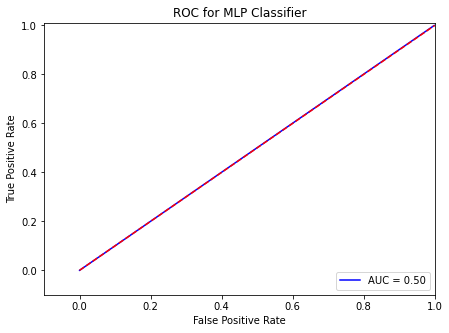

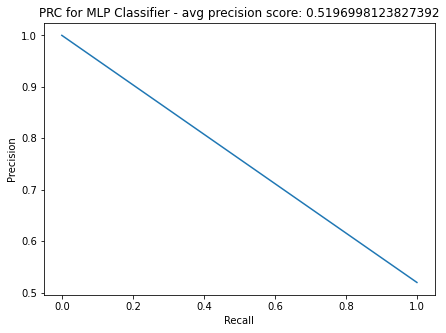

In [193]:
run_all_models()